<a href="https://colab.research.google.com/github/HimanshuKumar6565/lstm-fake-news-classifier/blob/main/FakeNewsClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
! pip install -q kaggle

In [4]:
from google.colab import files

files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"himanshukumar68","key":"4a3b7ea0cb0ecd9308c51ecf16b6fda8"}'}

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! kaggle datasets download clmentbisaillon/fake-and-real-news-dataset

Dataset URL: https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
License(s): CC-BY-NC-SA-4.0
 78% 32.0M/41.0M [00:00<00:00, 161MB/s] 
100% 41.0M/41.0M [00:00<00:00, 128MB/s]


In [6]:
!unzip /content/fake-and-real-news-dataset.zip

Archive:  /content/fake-and-real-news-dataset.zip
  inflating: Fake.csv                
  inflating: True.csv                


In [7]:
import pandas as pd

In [8]:
Fake=pd.read_csv("/content/Fake.csv")
true=pd.read_csv("/content/True.csv")

In [9]:
Fake['label']=0

In [10]:
Fake

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [11]:
true['label']=1

In [12]:
true

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",1
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",1
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",1
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",1


In [13]:
Fake.drop(columns=["title","date","subject"],inplace=True)
true.drop(columns=["title","date","subject"],inplace=True)

In [14]:
Fake.head()

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0


In [15]:
true.head()

,text,label
0,WASHINGTON (Reuters) - The head of a conservat...,1
1,WASHINGTON (Reuters) - Transgender people will...,1
2,WASHINGTON (Reuters) - The special counsel inv...,1
3,WASHINGTON (Reuters) - Trump campaign adviser ...,1
4,SEATTLE/WASHINGTON (Reuters) - President Donal...,1


In [16]:
News=pd.concat([Fake,true],ignore_index=True)
News

,text,label
0,Donald Trump just couldn t wish all Americans ...,0
1,House Intelligence Committee Chairman Devin Nu...,0
2,"On Friday, it was revealed that former Milwauk...",0
3,"On Christmas day, Donald Trump announced that ...",0
4,Pope Francis used his annual Christmas Day mes...,0
...,...,...
44893,BRUSSELS (Reuters) - NATO allies on Tuesday we...,1
44894,"LONDON (Reuters) - LexisNexis, a provider of l...",1
44895,MINSK (Reuters) - In the shadow of disused Sov...,1
44896,MOSCOW (Reuters) - Vatican Secretary of State ...,1


In [17]:
News.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44898 entries, 0 to 44897
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    44898 non-null  object
 1   label   44898 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 701.7+ KB


In [18]:
News.isnull().sum()

,0
text,0
label,0


In [19]:
News.duplicated().sum()

6251

In [20]:
News.drop_duplicates(inplace=True)
News.duplicated().sum()

0

In [21]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np
nltk.download('wordnet', "/kaggle/working/nltk_data/")
nltk.download('omw-1.4', "/kaggle/working/nltk_data/")
nltk.download('punkt_tab', download_dir="/kaggle/working/nltk_data/")
! unzip /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
! unzip /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora
nltk.data.path.append("/kaggle/working/nltk_data/")

[nltk_data] Downloading package wordnet to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Archive:  /kaggle/working/nltk_data/corpora/wordnet.zip
   creating: /kaggle/working/nltk_data/corpora/wordnet/
  inflating: /kaggle/working/nltk_data/corpora/wordnet/lexnames  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adv  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/adv.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.verb  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/data.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/index.adj  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/LICENSE  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/citation.bib  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/noun.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/verb.exc  
  inflating: /kaggle/working/nltk_data/corpora/wordnet/README  
  inflating: /kaggle/w

In [22]:
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text


In [26]:
nltk.download('punkt', download_dir="/kaggle/working/nltk_data/")
nltk.download('stopwords', download_dir="/kaggle/working/nltk_data/")

[nltk_data] Downloading package punkt to /kaggle/working/nltk_data/...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     /kaggle/working/nltk_data/...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [27]:
example_text = "This is an example text with some extra spaces, punctuation, and stop words. It's also got some short words like 'a' and 'is'."
cleaned_text_example = process_text(example_text)
print(cleaned_text_example)


['example', 'text', 'extra', 'space', 'punctuation', 'stop', 'word', 'also', 'short', 'like']


In [28]:
# prompt: example_text = "This is an example text with some extra spaces, punctuation, and stop words. It's also got some short words like 'a' and 'is'." cleaned_text_example = process_text(example_text) print(cleaned_text_example)

example_text = "This is an example text with some extra spaces, punctuation, and stop words. It's also got some short words like 'a' and 'is'."
cleaned_text_example = process_text(example_text)
cleaned_text_example

['example',
 'text',
 'extra',
 'space',
 'punctuation',
 'stop',
 'word',
 'also',
 'short',
 'like']

In [29]:
x=News.drop('label',axis=1)
y=News.label

In [30]:
texts=list(x['text'])

In [31]:
cleaned_text = [process_text(text) for text in texts]

In [32]:
print(cleaned_text[:10])

[['donald', 'trump', 'wish', 'american', 'happy', 'year', 'leave', 'instead', 'give', 'shout', 'enemy', 'hater', 'dishonest', 'fake', 'news', 'medium', 'former', 'reality', 'show', 'star', 'country', 'rapidly', 'grows', 'stronger', 'smarter', 'want', 'friend', 'supporter', 'even', 'healthy', 'president', 'angry', 'pant', 'tweeted', 'great', 'america', 'realdonaldtrump', 'december', 'tweet', 'went', 'welll', 'expect', 'kind', 'sends', 'greeting', 'like', 'despicable', 'petty', 'infantile', 'gibberish', 'lack', 'decency', 'allow', 'rise', 'gutter', 'long', 'enough', 'citizen', 'bishop', 'talbert', 'swan', 'talbertswan', 'calvin', 'calvinstowell', 'impeachment', 'would', 'make', 'also', 'accept', 'regaining', 'control', 'congress', 'miranda', 'yaver', 'mirandayaver', 'hear', 'talk', 'include', 'many', 'people', 'hate', 'wonder', 'alan', 'sandoval', 'alansandoval', 'word', 'marlene', 'koren', 'pollitt', 'korencarpenter', 'including', 'fought', 'lost', 'badly', 'know', 'love', 'nothing', 'd

**split the texts and the labels of the fake and real news:¶**

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

In [34]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from sklearn.model_selection import train_test_split

cleaned_text = [process_text(text) for text in texts]
X_train_text, X_test_text, y_train, y_test = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)


tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train_text)

word_idx = tokenizer.word_index
v = len(word_idx)
print("the size of vocab =", v)

X_train = tokenizer.texts_to_sequences(X_train_text)
X_test = tokenizer.texts_to_sequences(X_test_text)



the size of vocab = 91495


In [35]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

maxlen = 150
X_train = pad_sequences(X_train,maxlen=maxlen)
X_test = pad_sequences(X_test,maxlen=maxlen)

In [36]:
y.value_counts()

,count
label,
1,21192
0,17455


In [37]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense,Input,GlobalMaxPooling1D,Dropout
from tensorflow.keras.models import Model
from keras import optimizers
import numpy as np
from tensorflow.keras.optimizers import Adam

In [38]:
inputt=Input(shape=(maxlen,))
learning_rate = 0.0001
x=Embedding(v+1,100)(inputt)
x = Dropout(0.5)(x)
x = LSTM(150,return_sequences=True)(x)
x = Dropout(0.5)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(2, activation='softmax')(x)

model = Model(inputt, x)


optimizer = Adam(learning_rate=learning_rate)

model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [40]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

In [41]:
history = model.fit(X_train, y_train_one_hot, epochs=15, validation_data=(X_test, y_test_one_hot))

Epoch 1/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 22s 17ms/step - accuracy: 0.6885 - loss: 0.5432 - val_accuracy: 0.9638 - val_loss: 0.1906
Epoch 2/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9741 - loss: 0.0862 - val_accuracy: 0.9774 - val_loss: 0.0945
Epoch 3/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 16s 16ms/step - accuracy: 0.9892 - loss: 0.0409 - val_accuracy: 0.9793 - val_loss: 0.0739
Epoch 4/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 21s 16ms/step - accuracy: 0.9934 - loss: 0.0252 - val_accuracy: 0.9775 - val_loss: 0.0714
Epoch 5/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.9962 - loss: 0.0187 - val_accuracy: 0.9792 - val_loss: 0.0616
Epoch 6/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.9972 - loss: 0.0112 - val_accuracy: 0.9763 - val_loss: 0.0673
Epoch 7/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9976 - loss: 0.0085 - val_accuracy: 0.9777 - val_loss: 0.0621
Epoch 8/15
967/967 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9988 - loss: 0.0052 - 

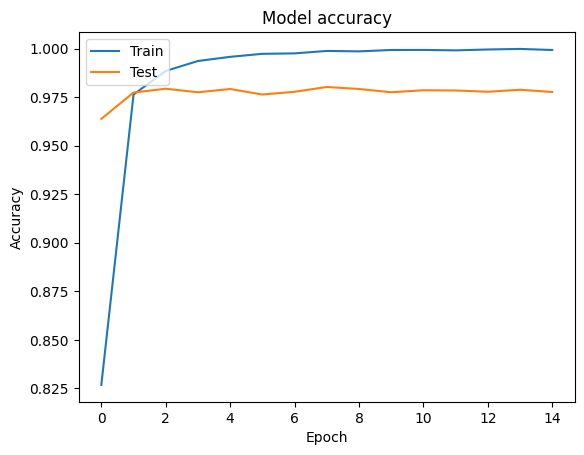

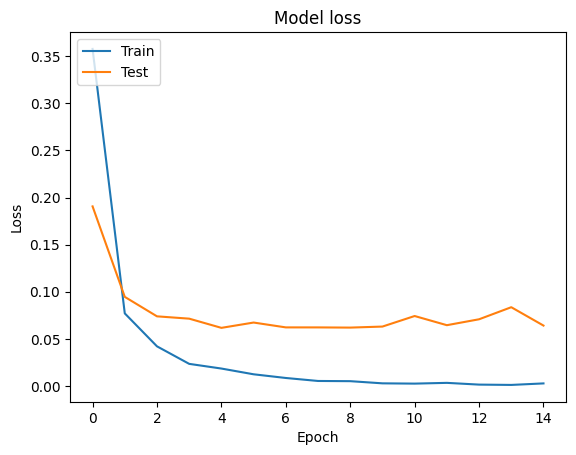

In [42]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [43]:

loss, accuracy = model.evaluate(X_test, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9804 - loss: 0.0567
Test Loss: 0.06404855847358704
Test Accuracy: 0.9776196479797363


242/242 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


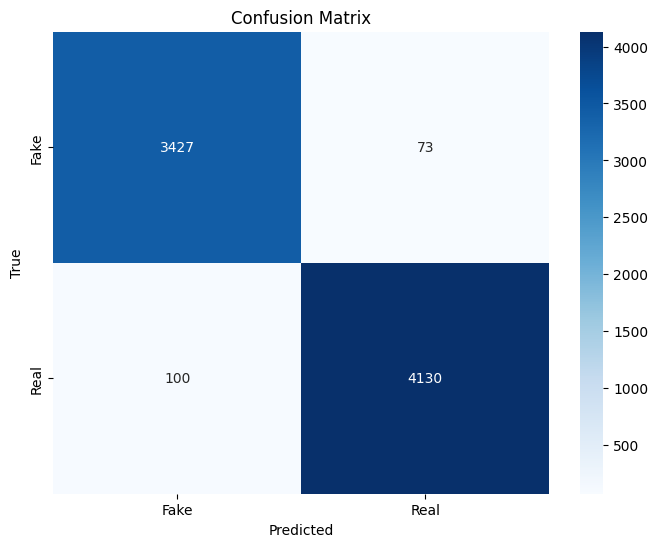

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(X_test)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Fake', 'Real'],
            yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [45]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [46]:
model.save('/content/drive/MyDrive/model_path.h5')

In [47]:
model.save('model_path.h5')

In [48]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.8/50.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.1/57.1 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.1/320.1 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 447.5/447.5 kB 28.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 59.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.8/63.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 130.2/1

In [49]:
import pickle


with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
!pip install gradio
import gradio as gr
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
#from sklearn.calibration import CalibratedClassifierCV  # Optional for calibration

# ... (Load model, tokenizer, and nltk downloads as before) ...

# Text preprocessing function (same as in your notebook)
def process_text(text):
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    text = re.sub(r'\W', ' ', str(text))
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()

    words = word_tokenize(text)

    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    stop_words = set(stopwords.words("english"))
    Words = [word for word in words if word not in stop_words]

    Words = [word for word in Words if len(word) > 3]

    indices = np.unique(Words, return_index=True)[1]
    cleaned_text = np.array(Words)[np.sort(indices)].tolist()

    return cleaned_text


def predict_news(text, threshold=0.9):  # Adjust threshold as needed
    cleaned_text = process_text(text)
    sequence = tokenizer.texts_to_sequences([cleaned_text])
    padded_sequence = pad_sequences(sequence, maxlen=150)
    prediction = model.predict(padded_sequence)
    # label = np.argmax(prediction) # Not needed for sigmoid
    if prediction[0][0] <= threshold:
        return "Fake"
    else:
        return "Real"

iface = gr.Interface(
    fn=predict_news,  # Use the updated predict_news function
    inputs=gr.Textbox(lines=5, placeholder="Enter news text here..."),
    outputs="text",
    title="Fake News Detection",
    description="Enter news text to determine if it's real or fake."
)

iface.launch(share=True)

In [ ]:
news_examples = [
    "A NASA spacecraft has officially 'touched' the sun, becoming the first probe to fly into the star's upper atmosphere.",
    "Pope Francis Shocks World, Endorses Donald Trump for President, Calls Him 'God's Chosen One'",
    "President Joe Biden on Wednesday announced a new plan to forgive up to $20,000 in federal student loan debt for millions of Americans",
    "Man Finds Bigfoot's Corpse While Hiking in the Woods, DNA Test Confirms",
    # Add more examples here...
]

# Make predictions
for example in news_examples:
    prediction = predict_news(example)
    print(f"News: {example[:100]}...")  # Print a portion of the news
    print(f"Prediction: {prediction}\n")

In [ ]:
news_examples = [
    "A NASA spacecraft has officially 'touched' the sun, becoming the first probe to fly into the star's upper atmosphere.",
    "Pope Francis Shocks World, Endorses Donald Trump for President, Calls Him 'God's Chosen One'",
    # ... (Add more examples here) ...
]

# Make predictions
for example in news_examples:
    # prediction = predict_news(example, threshold=0.7)  # Using predict_news
    # If using calibration:
    # prediction = calibrated_model.predict_proba([process_text(example)])[0][1]
    # prediction = "Real" if prediction > 0.7 else "Fake"  # Adjust threshold

    prediction = predict_news(example)

    print(f"News: {example[:100]}...")
    print(f"Prediction: {prediction}\n")